In [1]:
!pip install tensorflow numpy matplotlib seaborn scikit-learn


In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Input, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np


In [5]:
def AlexNet(input_shape=(227, 227, 3), num_classes=5):
    input_layer = Input(shape=input_shape)
    
    # 1st Convolutional Layer
    x = Conv2D(filters=96, kernel_size=(11, 11), strides=4, activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=2)(x)
    
    # 2nd Convolutional Layer
    x = Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=2)(x)
    
    # 3rd Convolutional Layer
    x = Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    
    # 4th Convolutional Layer
    x = Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    
    # 5th Convolutional Layer
    x = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=2)(x)
    
    # Flattening
    x = Flatten()(x)
    
    # 1st Fully Connected Layer
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    # 2nd Fully Connected Layer
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    # Output Layer
    output_layer = Dense(num_classes, activation='softmax')(x)
    
    # Create Model
    model = Model(inputs=input_layer, outputs=output_layer)
    
    return model


In [7]:
train_dir = r"/Users/harishgowda/Downloads/Lychee Disease Augmentation Dataset"
validation_dir = r"/Users/harishgowda/Downloads/Lychee Disease Augmentation Dataset"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.01,
    zoom_range=[0.9, 1.25],
    horizontal_flip=True,
    fill_mode='reflect',
    brightness_range=[0.5, 1.5]
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'  # Must be 'categorical' for multi-class classification
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)



Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [9]:
print("Training samples:", train_generator.samples)
print("Validation samples:", validation_generator.samples)


Training samples: 10000
Validation samples: 10000


In [11]:
model = AlexNet(input_shape=(227, 227, 3), num_classes=10)  # Changed to 10 classes

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

checkpoint = ModelCheckpoint(
    'alexnet_best_model.keras',  # Changed from .h5 to .keras
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

history = model.fit(
    train_generator,
    steps_per_epoch=127,  # Adjusted for training samples
    epochs=50,  # Changed to 5 epochs
    validation_data=validation_generator,
    validation_steps=31,  # Adjusted for validation samples
    callbacks=[checkpoint]
)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 227, 227, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 55, 55, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 27, 27, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,327,818 (222.50 MB)

 Trainable params: 58,325,066 (222.49 MB)

 Non-trainable params: 2,752 (10.75 KB)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2554 - loss: 3.8202
Epoch 1: val_accuracy improved from -inf to 0.09677, saving model to alexnet_best_model.keras
127/127 ━━━━━━━━━━━━━━━━━━━━ 333s 3s/step - accuracy: 0.2562 - loss: 3.8122 - val_accuracy: 0.0968 - val_loss: 3.9392
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4927 - loss: 1.7113
Epoch 2: val_accuracy did not improve from 0.09677
127/127 ━━━━━━━━━━━━━━━━━━━━ 837s 7s/step - accuracy: 0.4930 - loss: 1.7101 - val_accuracy: 0.0897 - val_loss: 6.1026
Epoch 3/50
 59/127 ━━━━━━━━━━━━━━━━━━━━ 2:32 2s/step - accuracy: 0.5769 - loss: 1.3622

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 3: val_accuracy improved from 0.09677 to 0.11492, saving model to alexnet_best_model.keras
127/127 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.5788 - loss: 1.3382 - val_accuracy: 0.1149 - val_loss: 4.4958
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.6187 - loss: 1.1547 
Epoch 4: val_accuracy improved from 0.11492 to 0.32157, saving model to alexnet_best_model.keras
127/127 ━━━━━━━━━━━━━━━━━━━━ 2595s 21s/step - accuracy: 0.6188 - loss: 1.1543 - val_accuracy: 0.3216 - val_loss: 2.5794
Epoch 5/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6603 - loss: 1.0516
Epoch 5: val_accuracy improved from 0.32157 to 0.61492, saving model to alexnet_best_model.keras
127/127 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.6604 - loss: 1.0510 - val_accuracy: 0.6149 - val_loss: 1.2085
Epoch 6/50
 59/127 ━━━━━━━━━━━━━━━━━━━━ 1:27 1s/step - accuracy: 0.7210 - loss: 0.8545
Epoch 6: val_accuracy did not improve from 0.61492
127/127 ━━━━━━━━━━━━━━━━━━━━ 88s 692ms/ste

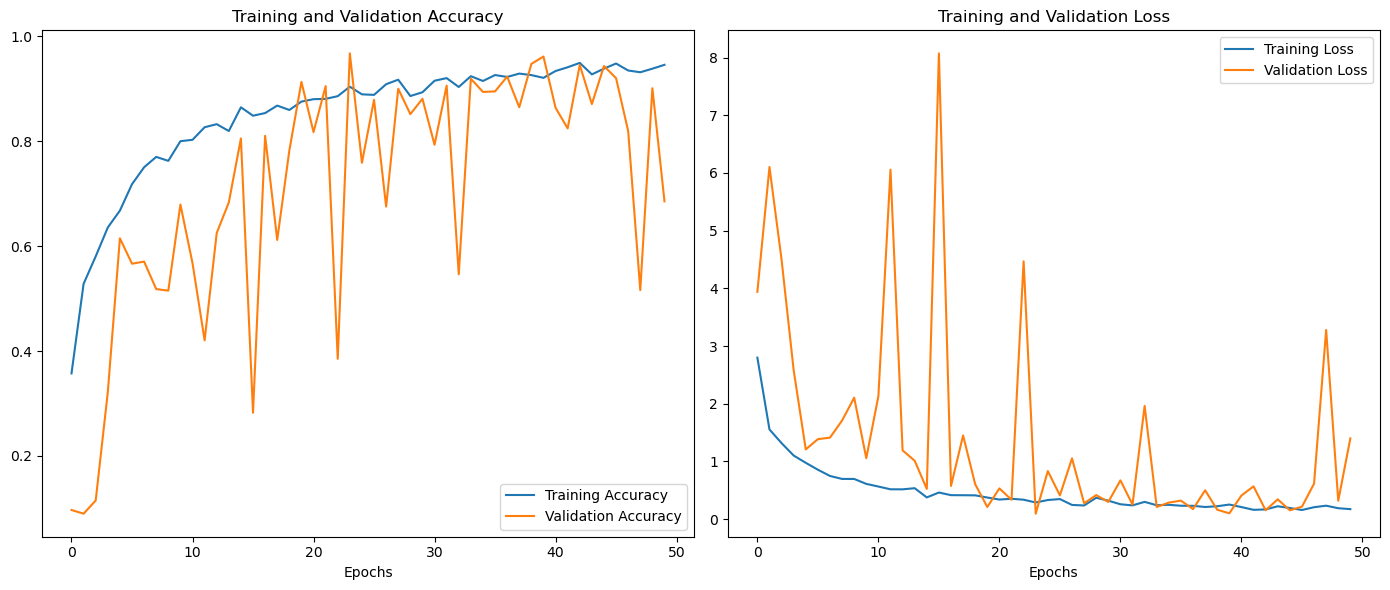

In [13]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(14, 6))
    
    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')  # Label for x-axis
    
    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')  # Label for x-axis
    
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Call the function to plot the training history
plot_training_history(history)


In [17]:
# Assuming you have a directory for the test set
test_dir = r"/Users/harishgowda/Downloads/Lychee Disease Augmentation Dataset"

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(227, 227),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

print("Calculating Model Accuracy for Testing")
test_scores = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_scores[1] * 100:.2f}%")


Found 10000 images belonging to 10 classes.
Calculating Model Accuracy for Testing
157/157 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.6960 - loss: 1.4614
Test Accuracy: 72.23%


313/313 ━━━━━━━━━━━━━━━━━━━━ 220s 701ms/step
Confusion Matrix:
 [[106  98 107  95 104 119  76 102  89 104]
 [107  89  91 102  90  98  97 124 103  99]
 [108  87  99 122 113 114  87  96  80  94]
 [ 97  99 101  99 114 102 101 106  92  89]
 [ 93  91 106 102  84 109  83 115 104 113]
 [104 117 100  90  98 118  79  89 106  99]
 [ 96  97 107 109  87  98  84 114 102 106]
 [ 98 102  94  91  93 116 107 102 105  92]
 [ 98  99 122 110  90 112  84  98  94  93]
 [ 95 103 104 108 105 106  83  87 107 102]]


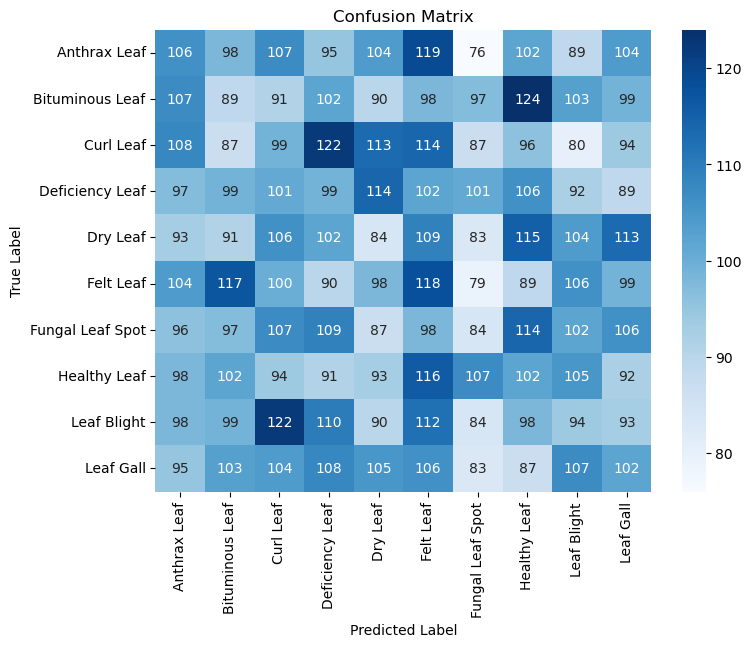

Classification Report:
                   precision    recall  f1-score   support

    Anthrax Leaf       0.11      0.11      0.11      1000
 Bituminous Leaf       0.09      0.09      0.09      1000
       Curl Leaf       0.10      0.10      0.10      1000
 Deficiency Leaf       0.10      0.10      0.10      1000
        Dry Leaf       0.09      0.08      0.08      1000
       Felt Leaf       0.11      0.12      0.11      1000
Fungal Leaf Spot       0.10      0.08      0.09      1000
    Healthy Leaf       0.10      0.10      0.10      1000
     Leaf Blight       0.10      0.09      0.09      1000
       Leaf Gall       0.10      0.10      0.10      1000

        accuracy                           0.10     10000
       macro avg       0.10      0.10      0.10     10000
    weighted avg       0.10      0.10      0.10     10000



In [19]:
model.load_weights('alexnet_best_model.keras')  # Update the filename extension

validation_generator.reset()
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Normal Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:\n', conf_mat)

# Pictorial Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print('Classification Report:\n', classification_report(y_true, y_pred, target_names=class_labels))


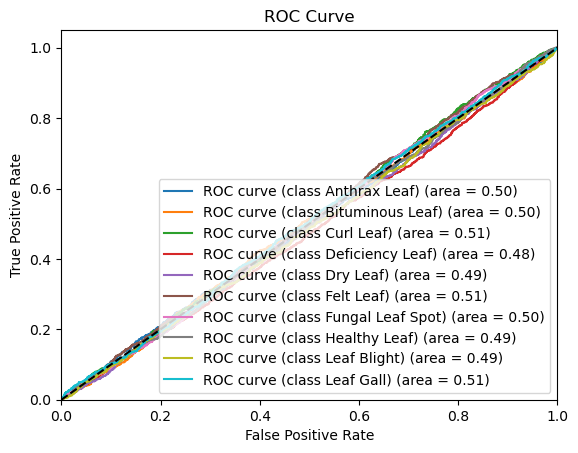

In [21]:
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(class_labels)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(validation_generator.classes, predictions[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {class_labels[i]}) (area = {roc_auc[i]:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
